# *2D classical Helium atom: Using ordinary differential equations, including first and second degree,  to realize a simulation regarding the motion of electrons in the 2D classical Helium atom.*

**Dafne Petrelli   -   220460804**

# *1.0 Abstract*

This report focuses on applying first and second degree ODE's techniques, such as the Euler and RK2 method and Leapfrog integration to extract data, which will be used to perform a simulation of an electron-electron interaction in a 2D classical helium atom.  Additionally, throughout this report, there will be a discussion on the element Helium's atomic structure, information regarding the dynamics of the system such as energy and angular momentum and finally an overview on the effect of specific parameters have on the system, such as the force of the electron-electron interaction.

***1.1 ODE's techniques***

The three methods listed above will be evaluated and ranked on their ability to conserve energy and angular momentum during the calculation. The function solve_ivp imported from the library SciPy will be treated as the exact solution, because it retains the highest precision out of all the methods.


*-Euler integration method-*

This method solves first-order ordinary differential equations. By applying the initial information provided by the slope it calculates the cumulative sum from one point to the next along the polygon approximation of the graph, ultimately reaching its final point [[0](https://www.pnw.edu/wp-content/uploads/2020/03/Lecture-Notes-10-5.pdf)]. Due to its simplicity, it is considered among the least precise methods when evaluating ODEs. The algorithm for this method is listed below:

$$
\begin{align}
t_1 &= t_0 + \Delta t\\
x_1 &= x_0 + v_0\Delta t\\
v_1 &= f(t_1, x_1)
\end{align}
$$


*-RK2 integration method-*

This method has a higher precision when compared to the Euler method. It uses the intermediate point of the slope to calculate the positions and velocities.
The algorithm for this method is listed below:
$$
\begin{align}
t_\text{int} &= t_0 + \tfrac12\Delta t\\
x_\text{int} &= x_0 + \tfrac12v_0\Delta t\\
v_\text{int} &= f(t_\text{int}, x_\text{int})\\
\\
t_1 &= t_0 + \Delta t\\
x_1 &= x_0 + v_\text{int}\Delta t\\
v_1 &= f(t_1, x_1)
\end{align}
$$


*-Leapfrog integration method-*

This method solves second-order ordinary differential equations. It continuously updates the position and velocity parameters at different intervals, staggered in a way they "leapfrog" each other [[1](https://en.wikipedia.org/wiki/Leapfrog_integration)].It is the most accurate method out of the three as it focuses on conserving energy and angular momentum which is ideal for producing this simulation. The algorithm for this method is listed below
$$
\begin{align}
a_\text{i}&= A(x_\text{i})\\
v_\text{i+(1/2)}&=v_\text{i-1/2 } + a_\text{i}\Delta t\\
x_\text{i+1}&=x_\text{i} + v_\text{i+1/2 }\Delta t\\
\end{align}
$$

All of the equations above are taken from [[2](https://en.wikipedia.org/wiki/Main_Page)]

# *2.0 Introduction*

***2.1 History***

Helium is the lightest of the noble gases. Its discovery was based on observing the gaseous atmosphere surrounding the Sun. It was realized by the French astronomer Pierre Janssen. He detected the a bright yellow line in the spectrum of solar chromosphere during an eclipse in 1868. This ultimately resulted in proving the existence of Helium in 1895 by British chemist Sir William Ramsay. This element constitutes of 23% of the mass of the universe, mainly concentrated in stars where it is synthesized from hydrogen during nuclear fusion [[3](https://www.britannica.com/science/helium-chemical-element)].

***2.2 Theory***

The classical helium atom studies the behavior of a single helium atom confined to two spatial dimensions. The system involves a nucleolus and two electrons interacting via Coulomb potentials. Similar to the three-body problem, a reduction in dimensionality affects the stability and energy levels of the atom. Solving the following equations of motion can provide approximate information about the model [[4](https://www.researchgate.net/publication/13237773_Helium_atom_as_a_classical_three-body_problem)].
$$
\begin{align}
a_\text{1}&=-2 \cdot r_\text{1} / r_\text{1}^3 + (r_\text{1}-r_\text{2})/r_\text{12}^3 \\
a_\text{2}&=-2 \cdot r_\text{2} / r_\text{2}^3 + (r_\text{2}-r_\text{1})/r_\text{12}^3 \\
\end{align}
$$







# *3.0  Method*

# 3.1  Section 1: Numerical precision
This section of the report focuses on solving a 2D Helium atom classically through the application of various ODE methods and comparing their precision. Firstly, the libraries that were used were imported and the initial conditions were defined. Varying the initial conditions will lead to an alteration in the electron-electron interaction. The equations of motion (14) and (15) and the distances between the electrons and their respective position to the nucleolus of the atom were computed to create the classical helium atom. Each ODE technique was then solved for positions and velocities with corresponding energies and angular momentums plot to establish which method came closest to the exact solution.

In [18]:
#import all libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from pylab import linspace
from matplotlib.animation import FuncAnimation, PillowWriter
import subprocess
import sys

In [19]:
#defining my initial conditions
def initial():
    R1 = np.array([2.0, 0.0])  #electron 1 position
    V1 = np.array([0.0, 0.95])  #electron 1 velocity
    R2 = np.array([-1.0, 0.0])  #electron 2 position
    V2 = np.array([0.0, -1.0])  #electron 2 velocity
    return [R1[0],R1[1],V1[0],V1[1],R2[0],R2[1],V2[0],V2[1]]


def autoionization():
    #initial conditions for autoionization
    R1= np.array([1.4,0])
    V1= np.array([0,0.86])

    R2= np.array([-1,0])
    V2= np.array([0,-1])
    return [R1[0],R1[1],V1[0],V1[1],R2[0],R2[1],V2[0],V2[1]]



The initial conditions were stored as 2x1 arrays to represent the electron's position and velocity on a 2d plane. Depending on their location and the velocity at which the electrons travel at, different orbits will be produced. One of the special cases is autoionization. This process is driven by the electron-electron interaction with the atom and it involves its transition to an unstable state. This spontaneously ejects an electron, resulting in a single ionized helium ion. The repulsive Coulomb force between the two electrons can provide sufficient energy for one electron to overcome the attraction of the nucleolus to escape [[5](https://link.springer.com/book/10.1007/978-1-4757-9751-0)]

In [20]:
#modelling the Helium atom

def He(t, y):
    R1_x, R1_y, V1_x, V1_y, R2_x, R2_y, V2_x, V2_y=y
    tolerance=1e-10 #to prevent division by 0

    r1=np.sqrt((R1_x**2)+(R1_y**2))+tolerance #distance from electron 1 to the atom
    r2=np.sqrt((R2_x**2)+(R2_y**2))+tolerance #distance from electron 2 to to the atom
    r12=np.sqrt(((R2_x-R1_x)**2)+((R2_y-R1_y)**2))+tolerance #distance between electron 1 and electron 2


    a1_x=((-2*R1_x)/(r1**3))+((R2_x-R1_x)/(r12**3)) #accelerations for electron 1
    a1_y=((-2*R1_y)/(r1**3))+((R2_y-R1_y)/(r12**3))
    a2_x=((-2*R2_x)/(r2**3))+((R1_x-R2_x)/(r12**3)) #accelerations for electron 2
    a2_y=((-2* R2_y)/(r2**3))+((R1_y-R2_y)/(r12**3))

    return [V1_x,V1_y,a1_x,a1_y,V2_x,V2_y,a2_x,a2_y]


In [21]:
#solve_ivp function
y0 = initial()
t_span = (0, 14)
t_eval_exact = np.linspace(*t_span, 50000)

def exact(y0, t_span, t_eval):
    solution=solve_ivp(He, t_span, y0, t_eval=t_eval_exact, method='RK45', atol=1e-10, rtol=1e-8,dense_output=True)
    return t_eval, solution.y.T

t_eval_exact,exact_solution= exact(y0, t_span, t_eval_exact)


Firstly the function for initial conditions was called, so it can reused throughout the code. The range for which the positions and velocities are calculated is between 0 and 14 and is provided by the variable t_span. The number 14 was decided upon because after various attempts, this is when the energy and angular momentum starts diverging, therefore the t_span was kept consistent for all the ODE solving methods. A function for the each ODE technique was constructed, for modularity and reusability purposes. The function takes four parameters:  He, y0, t_span and t_eval, which respectively correspond to the 2D helium atom, the initial conditions for position and velocity of the atom, the time ranging from 0 to 14 and finally the the solver which will compute the solution at points increasing by a factor of 14/10000 each time. Inside the function the initial conditions are built into an array and assigned to the variable y. This is then stored in a list that indicates the states of the electrons. The solving of each method is achieved through a loop that ranges though the length of values of t_eval.

In [22]:
#Euler integration method
y0 = initial()
t_span = (0, 14)
t_eval_euler = np.linspace(*t_span, 10000)

def Euler(He, y0, t_span, t_eval):
    y = np.array(y0)  # Initial state


    states=[y]

    for i in range(len(t_eval)-1): #doing a loop to solve the differential equation through the Euler method
        dt=t_eval[i+1]-t_eval[i]
        dydt=He(0, y)
        y+=dt*np.array(dydt)

        states.append(y)

    return t_eval,np.array(states)

t_eval_euler, euler_method=Euler(He, y0, t_span, t_eval_euler)

In the Euler method, the change in time is defined as the difference between the first point and the sequential point of the range decided upon. The derivative corresponds to the Helium atom function that contains the equations of motion and the initial state is updated each time a new change in time is calculated, dependent on each point. The new states are then appended to the list defined before the loop and they are converted into an array. Finally the function returns the time range and the array of the states.

In [23]:
#RK2 integration
y0 = initial()
t_span = (0, 14)
t_eval_rk2 = np.linspace(*t_span, 20000)

def RK2(He, y0, t_span, t_eval):
    y = np.array(y0)  # Initial state

    states=[y]

    for i in range(len(t_eval)-1): #doing a loop to solve the differential equation through the rk2 method
        dt=t_eval[i+1]-t_eval[i]
        k1=np.array(He(0, y))
        k2=np.array(He(0,(y+(dt*k1)/2))) #using k1 to calculate midpoint
        y+=dt*k2

        states.append(y.copy())

    return t_eval, np.array(states)

t_eval_rk2,rk2_method=RK2(He, y0, t_span, t_eval_rk2)

Similarly to the Euler method, a loop is implemented to the function but this time the midpoint is computed. k1 corresponds to the Helium atom function that contains the equations of motions, stored in an array. This midpoint is then calculated though the product between k1 and the change in time, divided by 2. The initial state is updated by computing the product of k2 by the time increase. The new states are then appended to the list defined before the loop and they are converted into an array. Finally the function returns the time range and the array of the states.

In [24]:
#Leap frog integration
y0 = initial()
t_span = (0, 14)
t_eval_leapfrog = np.linspace(*t_span, 20000)

def leapfrog(He, y0, t_span, t_eval):
    y = np.array(y0)  # Initial state

    states=[y]

    dydt = He(0, y)
    dt=t_eval[1]-t_eval[0]
    y[2:4]+=(1/2)*(t_eval[1]-t_eval[0])*(np.array(dydt[2:4]))
    y[6:8]+=(1/2)*(t_eval[1]-t_eval[0])*(np.array(dydt[6:8]))

    for i in range(len(t_eval)-1): #doing a loop to solve the differential equation through the leapfrog method

        dt=t_eval[i+1]-t_eval[i]
        y[0:2]+=dt*(y[2:4])
        y[4:6]+=dt*(y[6:8])

        dydt = He(0, y)
        y[2:4]+=dt*np.array(dydt[2:4])
        y[6:8]+=dt*np.array(dydt[6:8])

        states.append(y.copy())

    return t_eval, np.array(states)

t_eval_leapfrog,leapfrog_method=leapfrog(He, y0, t_span, t_eval_leapfrog)


At the begging of the leapfrog method function, the velocities y[0:2] and y[4:6] are advance by 1/2 of the time step, which indicates the staggering technique applied in this method. This half time step ensures that the sequential position is also updates at a full time step. This staggering technique leads the velocities and position to "leapfrog" over each other, enhancing the accuracy of this method. A loop is then provided to update the equation of motions. Firstly the positions y[0:2] and y[4:6] are calculated by using the product between the current velocities and the change in time. Secondly the derivative is remodeled by using the updated positions and thirdly the velocities are computed and updated by the product of the change in time and the the updated accelerations from the derivative above. The new states are then appended to the list defined before the loop and they are converted into an array. Finally the function returns the time range and the array of the states.

In [25]:
#computing the total energy

def energy(state):

    R1_x, R1_y, V1_x, V1_y, R2_x, R2_y, V2_x, V2_y=state
    tolerance=1e-10 #to prevent division by 0

    r1=np.sqrt((R1_x**2)+(R1_y**2))+tolerance #distance from electron 1 to the atom
    r2=np.sqrt((R2_x**2)+(R2_y**2))+tolerance #distance from electron 2 to to the atom
    r12=np.sqrt(((R2_x-R1_x)**2)+((R2_y-R1_y)**2))+tolerance #distance between electron 1 and electron 2


    energy_kinetic=(1/2)*(((V1_x)**2)+((V1_y)**2)+((V2_x)**2)+((V2_y)**2))
    energy_potential=(-2/(r1))-(2/(r2))+(1/(r12))

    return (energy_kinetic+energy_potential)

#computing angular momentum
def ang_momentum(state):

    R1_x, R1_y, V1_x, V1_y, R2_x, R2_y, V2_x, V2_y=state
    m1= (R1_x*V1_y)-(R1_y*V1_x)
    m2=(R2_x*V2_y)-(R2_y*V2_x)
    return (m1+m2)

#conservation of total energy and conservation of the total angular momentum
def conservation(t_eval,solution):
    tot_energy=[]
    tot_ang_momentum=[]

    for state in solution:
        e=energy(state)
        m=ang_momentum(state)

        tot_energy.append(e)
        tot_ang_momentum.append(m)

    return np.array(tot_energy),np.array(tot_ang_momentum)

# Correctly pass data to the conservation function
exact_energy, exact_ang_momentum = conservation(t_eval_exact, exact_solution)
euler_energy, euler_ang_momentum = conservation(t_eval_euler, euler_method)
rk2_energy, rk2_ang_momentum = conservation(t_eval_rk2, rk2_method)
leapfrog_energy, leapfrog_ang_momentum = conservation(t_eval_leapfrog, leapfrog_method)


# Summarize results
print("Exact Method:")
print(f"Final Energy: {exact_energy[-1]:.6f}")
print(f"Final Angular Momentum: {exact_ang_momentum[-1]:.6f}")

print("\nEuler Method:")
print(f"Final Energy: {euler_energy[-1]:.6f}")
print(f"Final Angular Momentum: {euler_ang_momentum[-1]:.6f}")

print("\nRK2 Method:")
print(f"Final Energy: {rk2_energy[-1]:.6f}")
print(f"Final Angular Momentum: {rk2_ang_momentum[-1]:.6f}")

print("\nLeapfrog Method:")
print(f"Final Energy: {leapfrog_energy[-1]:.6f}")
print(f"Final Angular Momentum: {leapfrog_ang_momentum[-1]:.6f}")


Exact Method:
Final Energy: 0.532745
Final Angular Momentum: 2.900000

Euler Method:
Final Energy: 4.994597
Final Angular Momentum: 3.043096

RK2 Method:
Final Energy: 0.596927
Final Angular Momentum: 2.900005

Leapfrog Method:
Final Energy: 0.558053
Final Angular Momentum: 2.900000


The energy and angular momentum were calculated, in order to generate a comparison between the ODE techniques to draw a conclusion on which method is the most accurate. 
The kinetic energy is computed by summing all of the kinetic energies together and halving them, while the potential energy is computed by summing the attractive force between the electrons and the nucleolus, and the repulsive force acting between the two electrons.

$$
\begin{align}
E_\text{k} &= 1/2\cdot [V1_\text{x} ^2 + V1_\text{y} ^2+ V2_\text{x} ^2+ V2_\text{y} ^2]\\
E_\text{p}&=-2/r_\text{1} - 2/r_\text{2} + 2/r_\text{12}\\
E_\text{total}&=E_\text{k}+E_\text{p}\\
\end{align}
$$

The angular momentum is computed for both electrons, m1 indicating electron 1's momenta and m2 indicating electron 2's momenta. This is done by subtracting the product of the electron's position in the y-axis by the electron's velocity in the x-axis from the product of the electron's position in the x-axis by the electron's velocity in the y-axis.
$$
\begin{align}
m_\text{1} &=  (R1_\text{x})\cdot(V1_\text{y}) - (R1_\text{y})\cdot(V1_\text{x})\\
m_\text{2} &=  (R2_\text{x})\cdot(V2_\text{y}) - (R2_\text{y})\cdot(V2_\text{x})\\
\end{align}
$$

Finally the third function unifies the two previous functions to check if these parameters are conserved in the model. This is realized by applying the "state" of the electron to each function and it is iterated for every state the electrons are in. This is achieved to check if the conservation laws hold for each step. To store this final value, it is appended to the empty list generated before the loop is initiated. The return values correspond to the total energy and total angular momentum of the model and are converted into arrays.

The purpose of these three functions is to provide a further insight in the physical dynamics of the system and to allow to draw a comparison on the different ODE techniques and their suitability in solving the 2D Helium atom model classically. 

All of the equations of motions from above are taken from [[6](https://dspace.mit.edu/bitstream/handle/1721.1/120336/5-61-fall-2013/contents/lecture-notes/MIT5_61F13_Lecture21-22.pdf)]

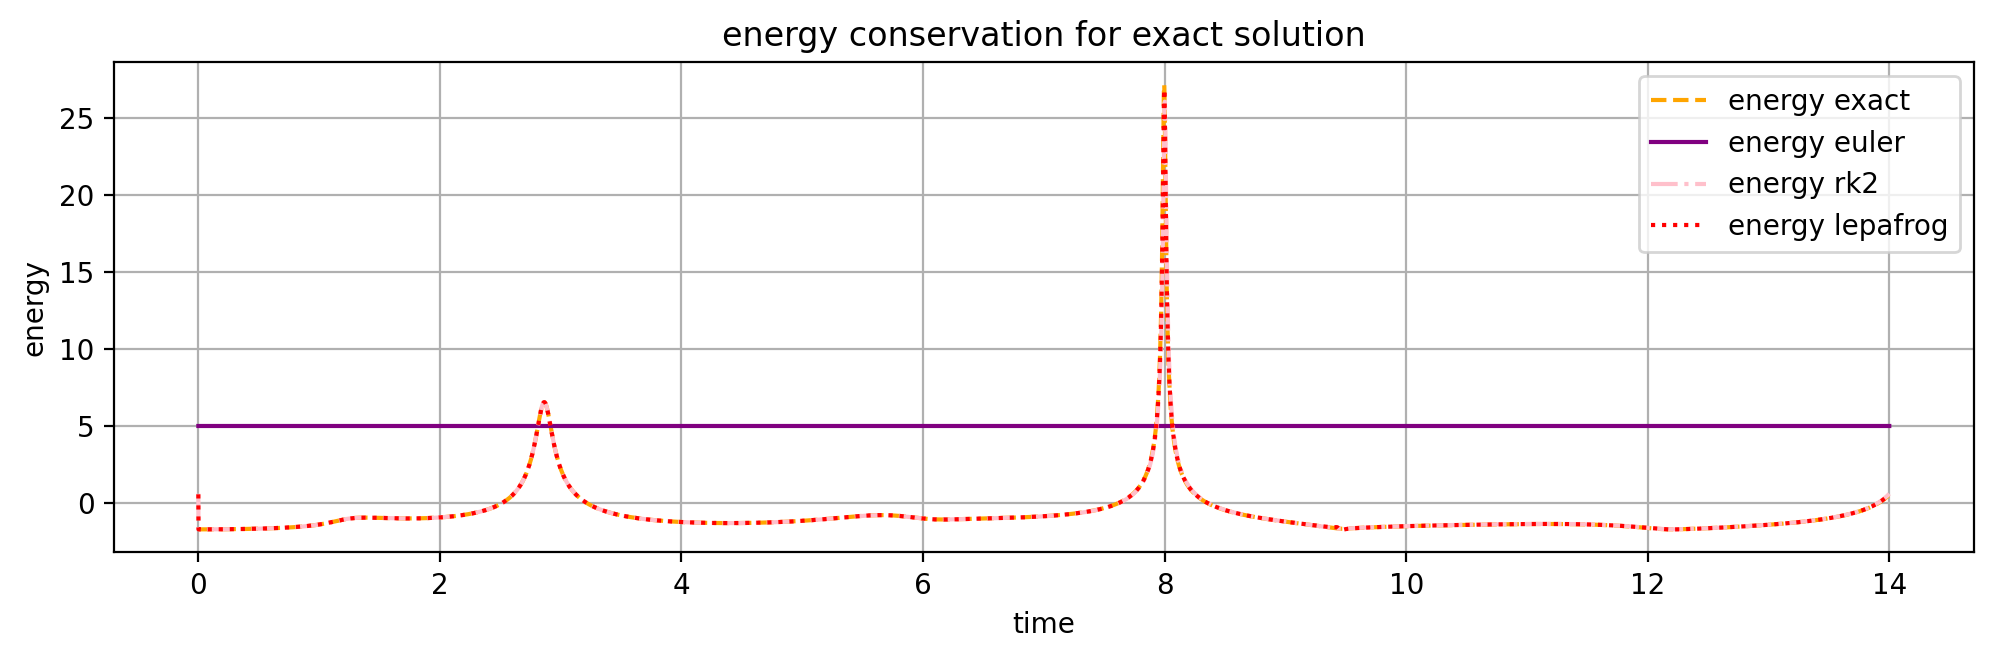

In [26]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t_eval_exact,exact_energy,color="orange",label="energy exact",linestyle="--")
plt.plot(t_eval_euler,euler_energy,color="purple",label="energy euler")
plt.plot(t_eval_rk2,rk2_energy,color="pink",label="energy rk2",linestyle="-.")
plt.plot(t_eval_leapfrog,leapfrog_energy,color="red",label="energy lepafrog",linestyle=":")
plt.xlabel("time")
plt.ylabel("energy")
plt.title("energy conservation for exact solution")
plt.grid()
plt.legend()
plt.show()

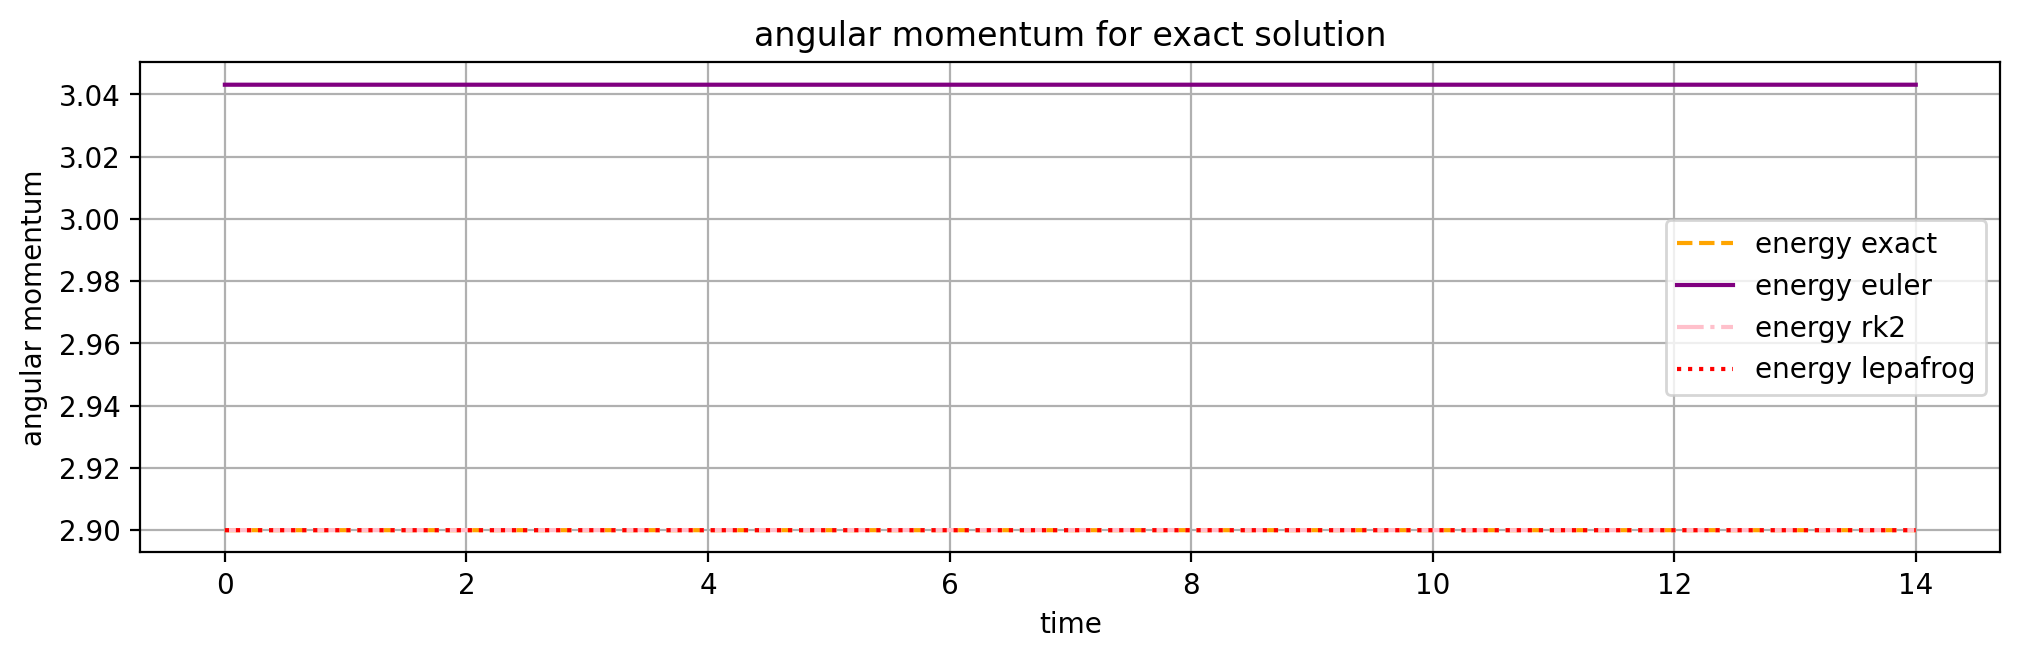

In [27]:
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t_eval_exact,exact_ang_momentum,color="orange",label="energy exact",linestyle="--")
plt.plot(t_eval_euler,euler_ang_momentum,color="purple",label="energy euler")
plt.plot(t_eval_rk2,rk2_ang_momentum,color="pink",label="energy rk2",linestyle="-.")
plt.plot(t_eval_leapfrog,leapfrog_ang_momentum,color="red",label="energy lepafrog",linestyle=":")
plt.xlabel("time")
plt.ylabel("angular momentum")
plt.title("angular momentum for exact solution")
plt.grid()
plt.legend()
plt.show()

From the results above, it can be observed that the most precise solving ODE's method is leapfrog integration. To visualize this a comparison in the results was plotted.

# 3.2  Section 2: Simulation

The function install_pillow that was applied throughout the generation of the simulation was taken from [[7](https://riptutorial.com/matplotlib/example/23558/basic-animation-with-funcanimation)].

***-Plotting of the orbits using the initial conditions used in Section 1-***

Animation saved as 'amplified_orbits_electrons.gif'


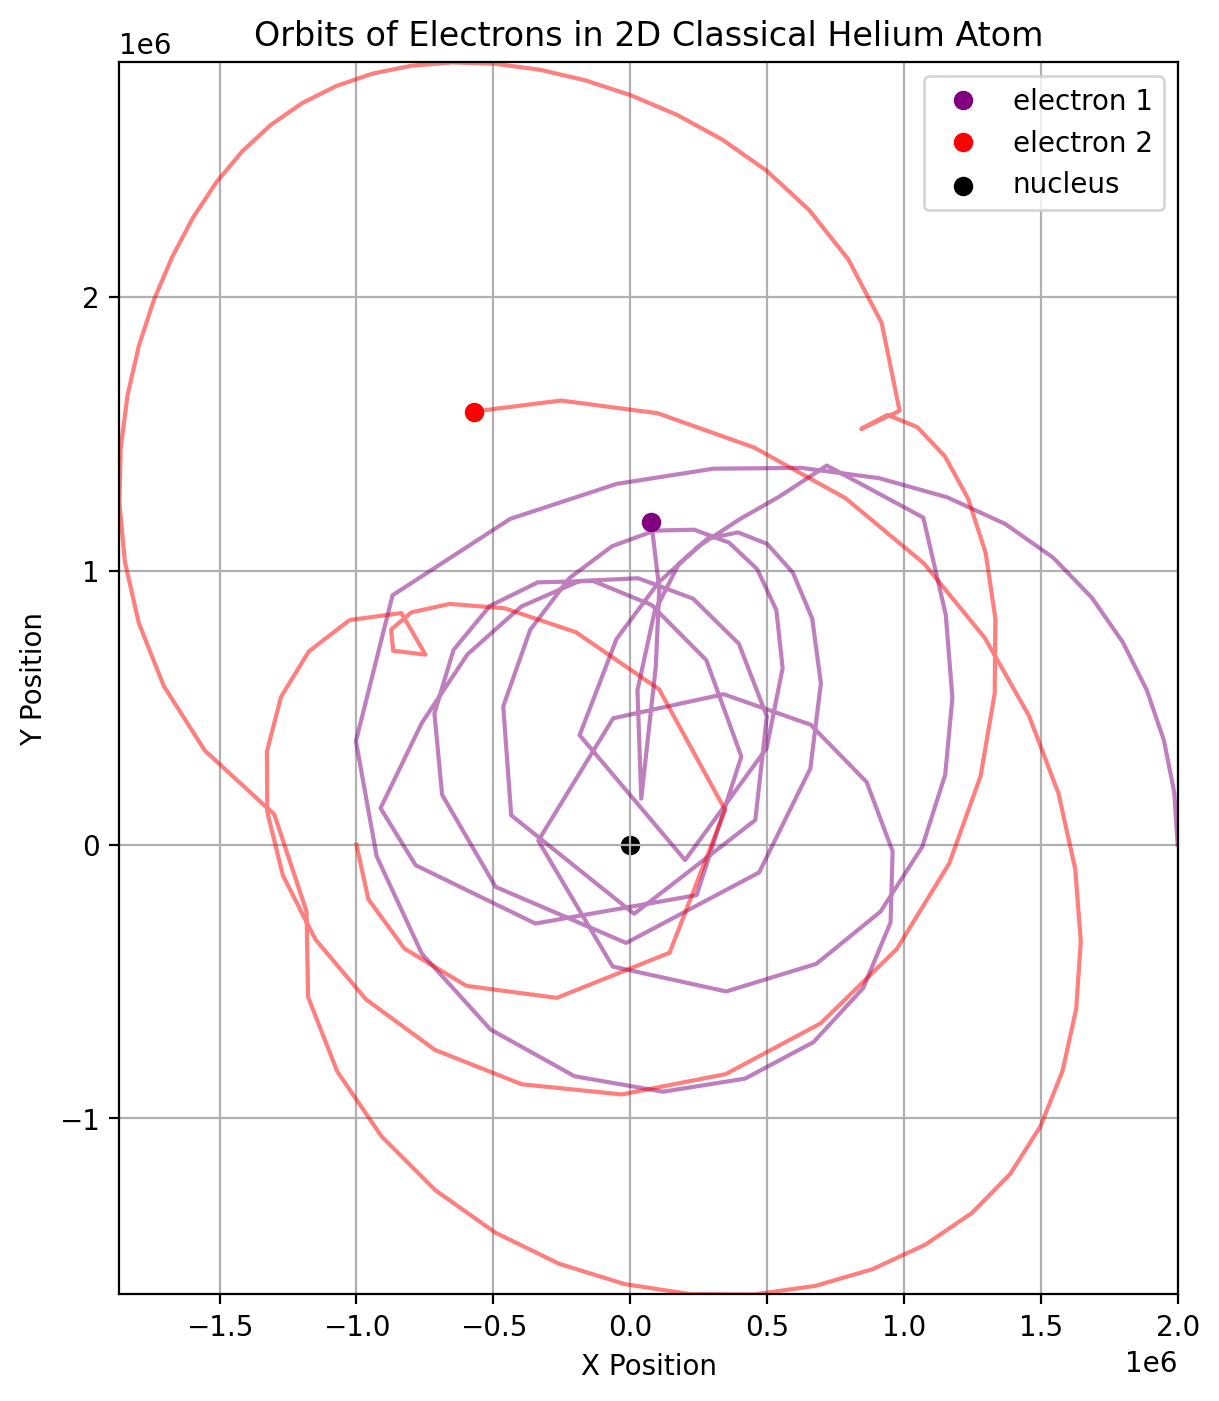

In [28]:
def install_pillow():
    try:
        import PIL
    except ImportError:
        import subprocess, sys
        subprocess.check_call([sys.executable, "-m", "pip", "install", "pillow"])
        print("Pillow successfully installed!")

install_pillow()




y0 = initial()
t_span = (0, 20)
t_eval = np.linspace(*t_span, 100)

solution = solve_ivp(He, t_span, y0, t_eval=t_eval, method='RK45', atol=1e-8, rtol=1e-6)
method_solution = solution.y

#amplifying for better visualization
amplification_factor = 1e6
R1_x = method_solution[0, :] * amplification_factor
R1_y = method_solution[1, :] * amplification_factor
R2_x = method_solution[4, :] * amplification_factor
R2_y = method_solution[5, :] * amplification_factor

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(min(R1_x.min(), R2_x.min()) - 1, max(R1_x.max(), R2_x.max()) + 1)
ax.set_ylim(min(R1_y.min(), R2_y.min()) - 1, max(R1_y.max(), R2_y.max()) + 1)

ax.set_title("Orbits of Electrons in 2D Classical Helium Atom")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.grid()
ax.set_aspect("equal")
e1, = ax.plot([], [], "o", color="purple", label="electron 1")
e2, = ax.plot([], [], "o", color="red", label="electron 2")
traj1, = ax.plot([], [], "-", color="purple", alpha=0.5)
traj2, = ax.plot([], [], "-", color="red", alpha=0.5)
nucleus = ax.scatter(0, 0, color="black", label="nucleus")

ax.legend()

#animation function
def init():
    e1.set_data([], [])
    e2.set_data([], [])
    traj1.set_data([], [])
    traj2.set_data([], [])
    return e1, e2, traj1, traj2


def update(frame):
    e1.set_data(R1_x[frame], R1_y[frame])
    e2.set_data(R2_x[frame], R2_y[frame])
    traj1.set_data(R1_x[:frame+1], R1_y[:frame+1])
    traj2.set_data(R2_x[:frame+1], R2_y[:frame+1])
    return e1, e2, traj1, traj2

#animation
ani = FuncAnimation(fig, update, frames=len(t_eval), init_func=init, blit=True)

#saving animation as gif
pillow_writer = PillowWriter(fps=10)
ani.save("amplified_orbits_electrons.gif", writer=pillow_writer)

print("Animation saved as 'amplified_orbits_electrons.gif'")

*simulation 1 ("Orbits following initial conditions simulation)"*

***-Autoionization plotting of the orbits -***

Animation saved as 'autoionization.gif'


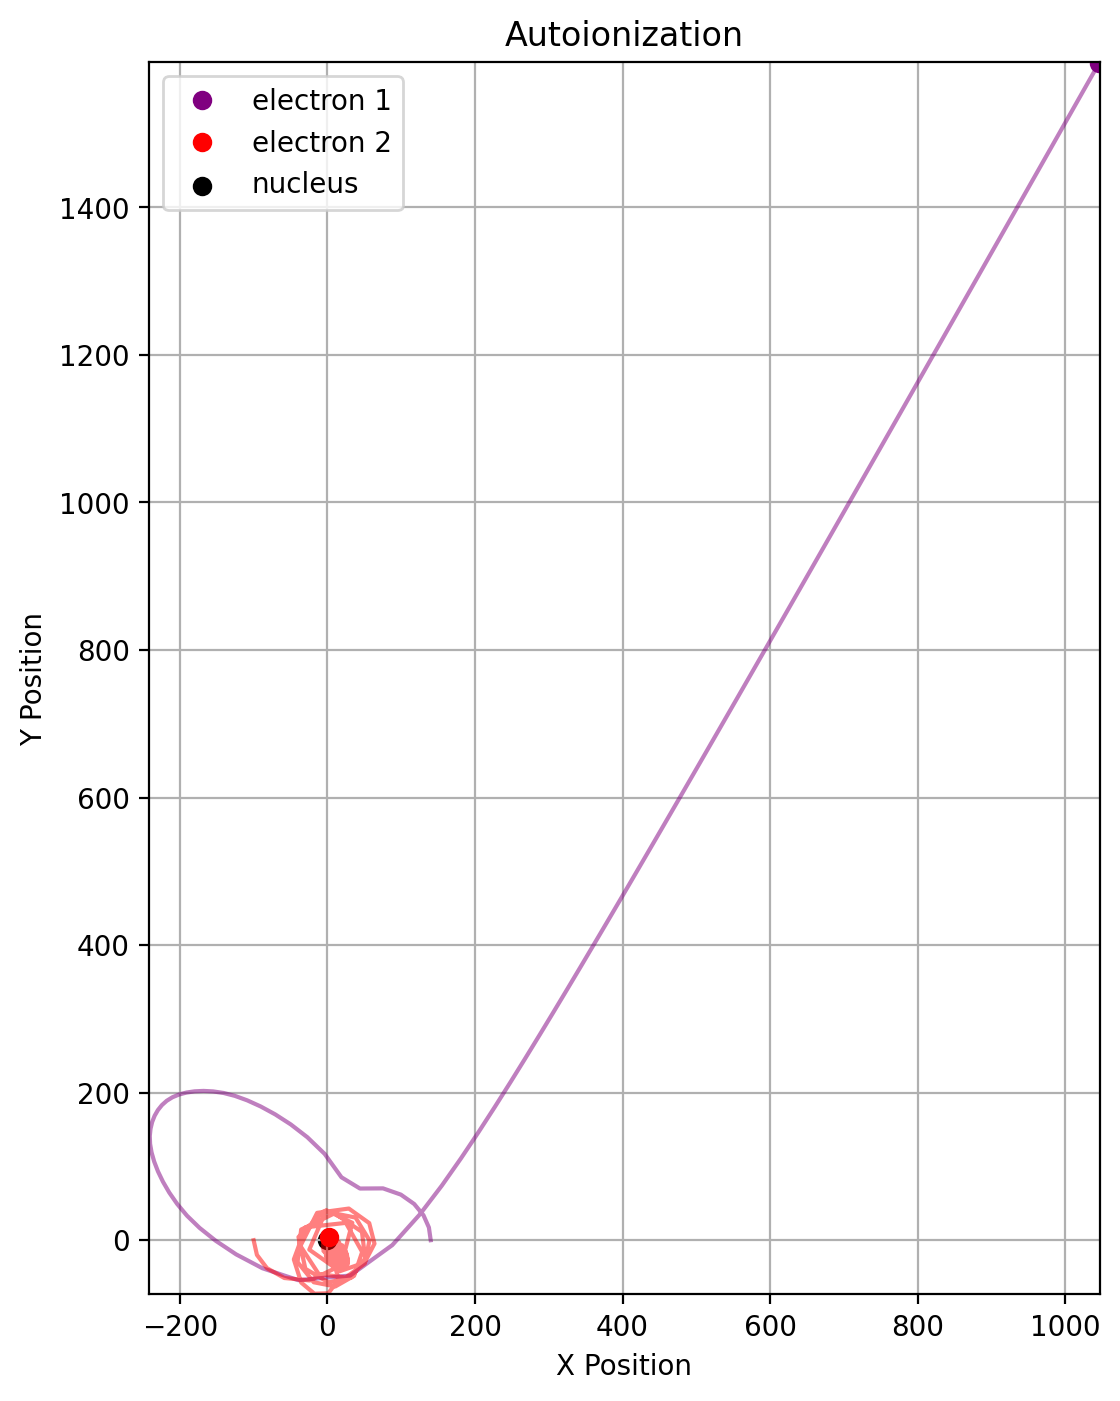

In [29]:
def install_pillow():
    try:
        import PIL
    except ImportError:
        import subprocess, sys
        subprocess.check_call([sys.executable, "-m", "pip", "install", "pillow"])
        print("Pillow successfully installed!")

install_pillow()

#using the solve_ivp function, since it is the most accurate
y0 = autoionization()
t_span = (0, 20)
t_eval_autoionization = np.linspace(*t_span, 100)

solution = solve_ivp(He, t_span, y0, t_eval=t_eval_autoionization, method='RK45', atol=1e-8, rtol=1e-6)
method_solution = solution.y

#apllying an amplifying factor, to hightlight the positions better
amplification_factor = 1e2
R1_x = method_solution[0, :] * amplification_factor
R1_y = method_solution[1, :] * amplification_factor
R2_x = method_solution[4, :] * amplification_factor
R2_y = method_solution[5, :] * amplification_factor

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(min(R1_x.min(), R2_x.min()) - 1, max(R1_x.max(), R2_x.max()) + 1)
ax.set_ylim(min(R1_y.min(), R2_y.min()) - 1, max(R1_y.max(), R2_y.max()) + 1)

ax.set_title("Autoionization")
ax.set_xlabel("X Position")
ax.set_ylabel("Y Position")
ax.grid()
ax.set_aspect("equal")


e1, = ax.plot([], [], "o", color="purple", label="electron 1")
e2, = ax.plot([], [], "o", color="red", label="electron 2")
traj1, = ax.plot([], [], "-", color="purple", alpha=0.5)
traj2, = ax.plot([], [], "-", color="red", alpha=0.5)
nucleus = ax.scatter(0, 0, color="black", label="nucleus")

ax.legend()

#animation function
def init():
    e1.set_data([], [])
    e2.set_data([], [])
    traj1.set_data([], [])
    traj2.set_data([], [])
    return e1, e2, traj1, traj2


def update(frame):
    e1.set_data(R1_x[frame], R1_y[frame])
    e2.set_data(R2_x[frame], R2_y[frame])
    traj1.set_data(R1_x[:frame+1], R1_y[:frame+1])
    traj2.set_data(R2_x[:frame+1], R2_y[:frame+1])
    return e1, e2, traj1, traj2

#animation
ani = FuncAnimation(fig, update, frames=len(t_eval), init_func=init, blit=True)

#saving animation as gif
pillow_writer = PillowWriter(fps=10)
ani.save("autoionization.gif", writer=pillow_writer)

print("Animation saved as 'autoionization.gif'")

*simulation 2 ("Orbits following autoionization conditions simulation")*

***-Effect of the Force on the electron-electron interaction-***

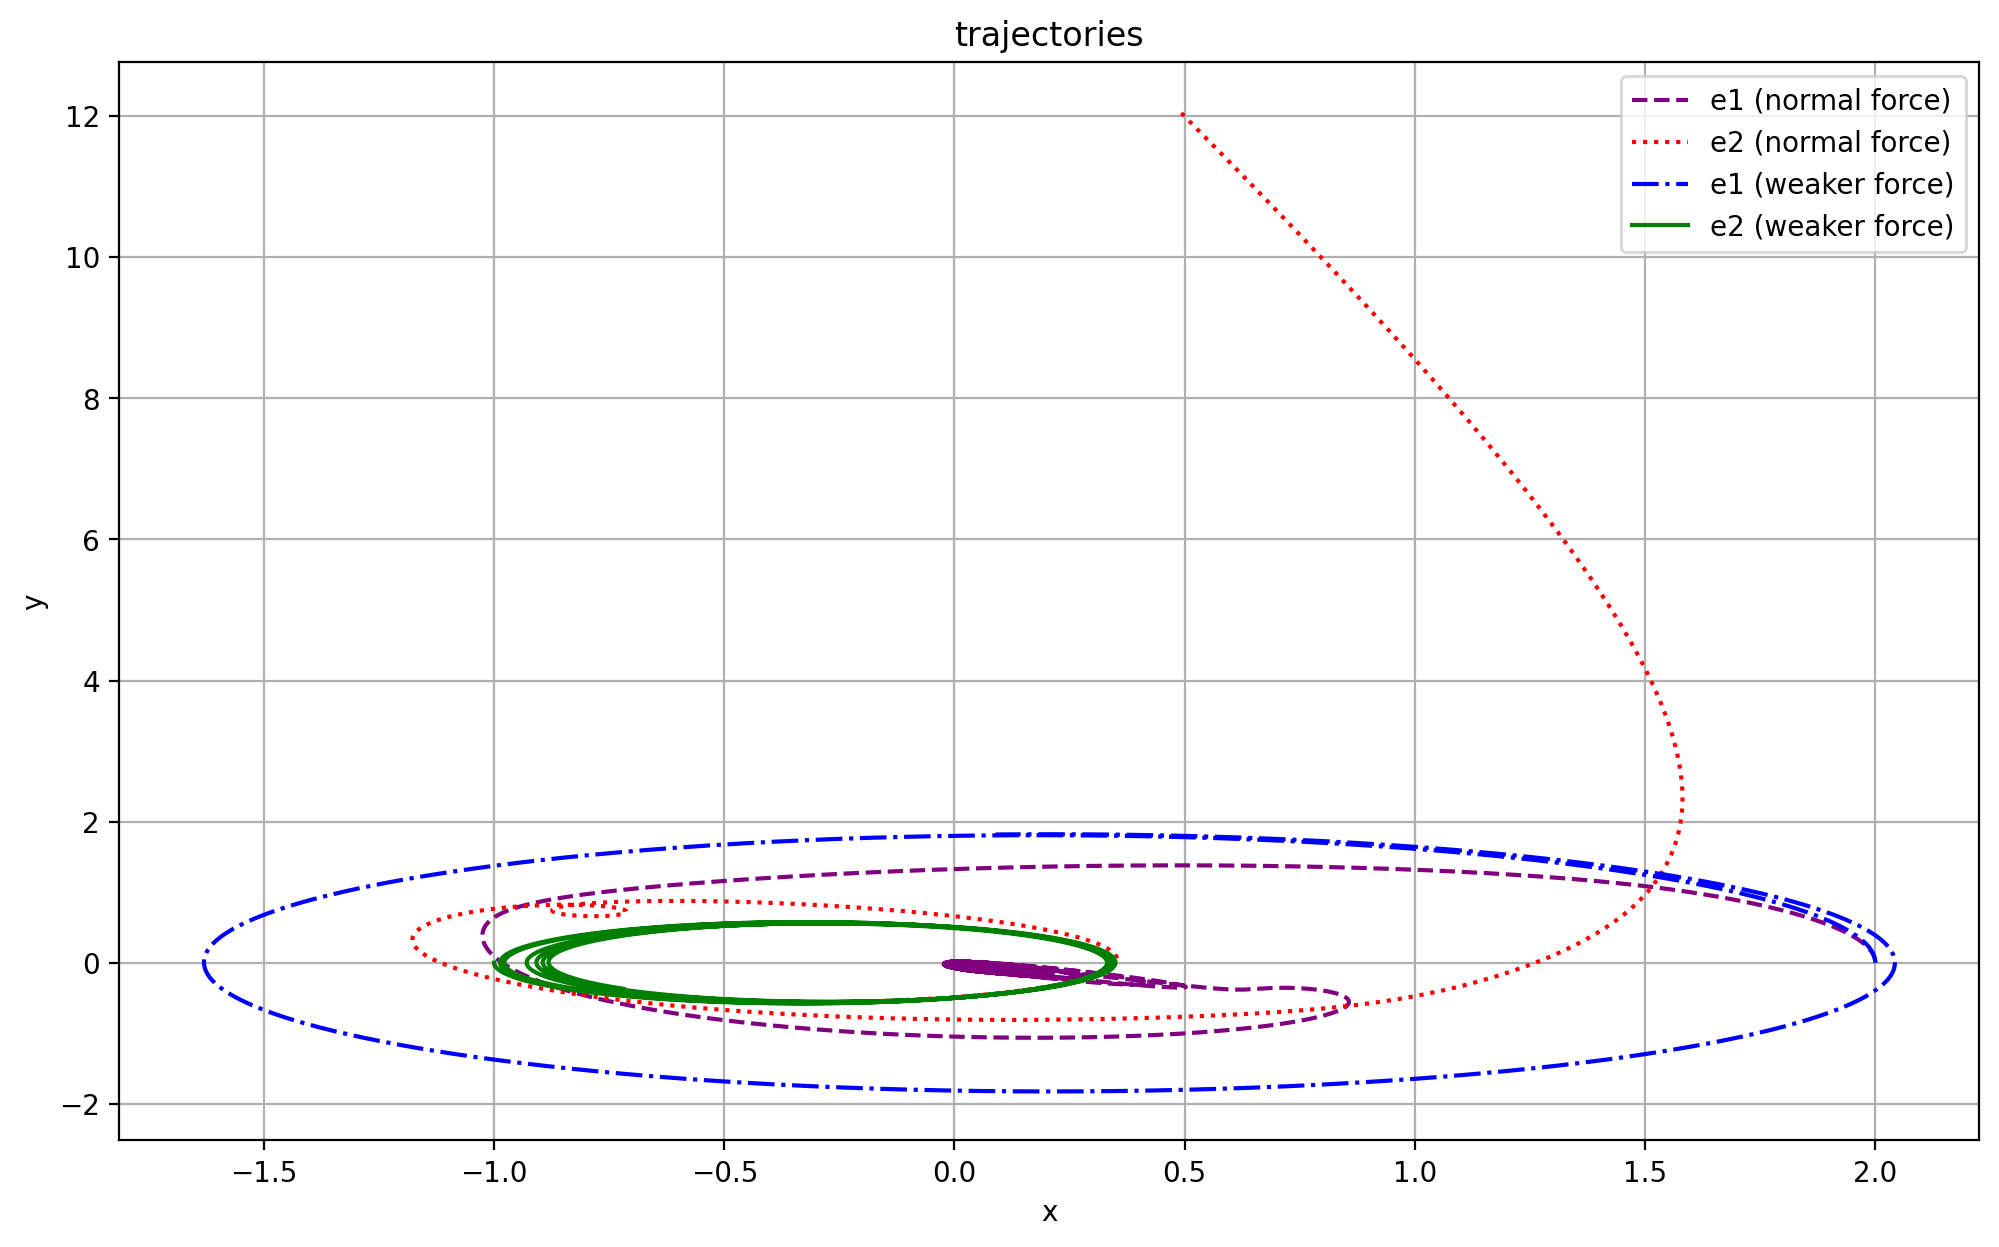

In [30]:
y0=initial()

def He_with_factor(t, y,interaction_factor):
    R1_x, R1_y, V1_x, V1_y, R2_x, R2_y, V2_x, V2_y=y
    tolerance=1e-10 #to prevent division by 0

    r1=np.sqrt((R1_x**2)+(R1_y**2))+tolerance #distance from electron 1 to the atom
    r2=np.sqrt((R2_x**2)+(R2_y**2))+tolerance #distance from electron 2 to to the atom
    r12=np.sqrt(((R2_x-R1_x)**2)+((R2_y-R1_y)**2))+tolerance #distance between electron 1 and electron 2


    a1_x=((-2*R1_x)/(r1**3))+interaction_factor*((R2_x-R1_x)/(r12**3)) #accelerations for electron 1
    a1_y=((-2*R1_y)/(r1**3))+interaction_factor*((R2_y-R1_y)/(r12**3))
    a2_x=((-2*R2_x)/(r2**3))+interaction_factor*((R1_x-R2_x)/(r12**3)) #accelerations for electron 2
    a2_y=((-2* R2_y)/(r2**3))+interaction_factor*((R1_y-R2_y)/(r12**3))

    return [V1_x,V1_y,a1_x,a1_y,V2_x,V2_y,a2_x,a2_y]

effect_force = solve_ivp(He_with_factor, t_span, y0, t_eval=t_eval_exact, args=(1.0,))
effect_force_weak = solve_ivp(He_with_factor, t_span, y0, t_eval=t_eval_exact, args=(0.01,))

plt.figure()
plt.plot(effect_force.y[0], effect_force.y[1],color="purple", label="e1 (normal force)", linestyle="--")
plt.plot(effect_force.y[4], effect_force.y[5],color="red", label="e2 (normal force)", linestyle=":")
plt.plot(effect_force_weak.y[0], effect_force_weak.y[1],color="blue" ,label="e1 (weaker force)", linestyle="-.")
plt.plot(effect_force_weak.y[4], effect_force_weak.y[5], color="green",label="e2 (weaker force)", linestyle="-")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("trajectories")
plt.grid()
plt.show()




*simulation 3 ("Trajectories simulation dependent on interaction factor)"*

# 4.0 Discussion and analysis

*Simulation 1*

This simulation's purpose is to showcase the orbits of two electrons orbiting around a 2D classical helium atom model, built on initial conditions that moderately maintain the dynamics of the system stable.

Both electron 1 and electron 2, respectively highlighted by the color purple and red, initially exhibit orbit-like behavior around the nucleus, but are effected by the repulsive and attractive nuclear forces involved in the system. Electron 1’s orbit shows a clear outward spiral, suggesting it is gaining energy through interactions with electron 2. As it moves farther from the nucleus, its motion becomes unstable. Electron 2’s trajectory also displays a spiraling pattern, but it travels slower than electron 1. Its motion suggests it remains more strongly bound to the nucleus while still being affected by the repulsive force of electron 1. The overlapping regions of the trajectories for the two electrons suggest significant energy exchanges during close interactions.

The overlapping of the two electrons' orbits near the nucleus demonstrate a presence of chaotic transients, which are temporary periods in which the system dynamics are shifted into a chaotic state before eventually reaching a periodic and stable behavior[[8](https://watermark.silverchair.com/100-6-1089.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAA1QwggNQBgkqhkiG9w0BBwagggNBMIIDPQIBADCCAzYGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMiuFhUVXmu_ILY0BpAgEQgIIDB0onmgdIzbDesFW2Z3JB0WLUf0gnqxBXk5P6htWpYzqITTykzrUiLw59T35NS0T_jN8s_tEO0PjpWeIlmKy6Fi8VETGVTgJXU99SgMk1XEvSyndQOQncjUhrcWvxqniYKgLzI3XCvBzlqtz1HozRtTCFd6Ix12tGDfxZBTGx2AGtP1g0gF9psejTSK1VKYqrv69LkKSAg1fP6qZGLIYyEoDqAaNegUKk6sm4U6QRG29dR8W1uklgxauBCPdQjvJzlJS_NAA8LVg24Rl_mo1Ck-WnrGjV8RqkByELrO7lXnFndiTaz4xAvraY3G2tRuiD_N3G1DRYjidKTzZiPFxup-npjPBOURHwTI2hcQF23Wki-iefF-wTgl12YC8NMZZAJxl-FlYjzkIudYzyjM_e9vGZn39kTXSjRURzJoIpJLB6vydObzba1TEsUtP32TBm5WIm3DUwiemtDPfB3soHrvDPtNOVmOFsUmNVeLB8FzlQuSPzueros8WSIeHlLOEss7iGefLwSSQSxrA8esgzMjCMmWzQHraWbTys8D0AtAp_AwARbb4l2cE2o0_dDD1DyaxqkGQ1aLc03jNwlN8ys-h3tMl0ZwIvKrakOXEB4UAI6jWX03u48utStB9vXCH9_MwiWWHWDqt8WkmUU9ODlpOyCTqZryKvt0eSbcPnNDqd2cxlRS7ORFGllQ3Y1YrFypGm3lGoUB-qr_HRND9Y3EH9xw3ptFBwEOeL2zdQarPS7XaRGZg5S5u9hJoOTDuDCiCQYpcOQAQNi2J7-Mnlgx4L9w1KP67qDZKcPmJhsfPdwQHwKgK7OfxxABeIA8v2tT9SO7sN1Dh8LXF6qYNWlcUb1XWeSFQTD41urbZUOCjEltWMqhfV2fp88FIPgaYQfc4AeGDwz9jJWJSCAdPAG2lcCBZubtpwvby_bCpMgKiH6JcHaOlYSGCZE_42zxe0qp6wAhVtJpxpJFLZcFgMkNBIw-1xcK19q-8gf9bBQdIPvJj5HFSeJ342KlPicNTPz4GgI1k9Wa8)].

*Simulation 2*

The term  autoionization in a classical helium atom refers to the emission of an outer-shell electron by an atom in an excited state, caused by the interaction between the two electrons and the nucleus. In the simulation, this phenomenon is showcased by the trajectory of electron 1, highlighted in purple, which escapes to infinity, instead of remaining in the nucleus's orbit with electron 2, highlighted in red. This ejection occurs due to electron 2 transferring energy to electron 1, which leads it to overcome the electrostatic attraction that binds it to the nucleus.

Before electron 1 escapes, the system undergoes chaotic transients. They are crucial when identifying the random nature of the autoionization process, as slight varying of the initial conditions may cause different outcome, therefore their studying provides further investigation in the ionization of more complex systems [[9](https://arxiv.org/pdf/1111.5794)].

To analyze the accuracy of the numerical methods used in the simulation, a comparison was performed between the fixed-step and adaptive-step integration techniques using the  solve_ivp function. The adaptive solver adjusts step sizes to maintain accuracy, while the fixed-step solver uses a constant step size. The plot of the error between the two methods reveals findings into the numerical challenges posed by this system.

Initially, the error between the fixed-step and adaptive-step methods is minimal. However, as the system progresses into regions of chaotic transients, specifically in the energy exchange between electron 2 and electron 1, the error grows significantly, peaking sharply around moments before the autoionization. These error spikes highlight the limitations of the fixed-step size method when involved in random changes that occur during chaotic transients. On the other hand, the adaptive solve effectively resolves these dynamics by reducing the step size to maintain precision.

The chaotic transients not only impact the numerical stability of the solution but also result in apparent fluctuations in the system's total energy and angular momentum. While the classical model assumes conservation of these quantities, the numerical integration introduces discrepancies due to approximations. Adaptive methods minimize these fluctuations compared to fixed-step methods, which accumulate significant errors over time.

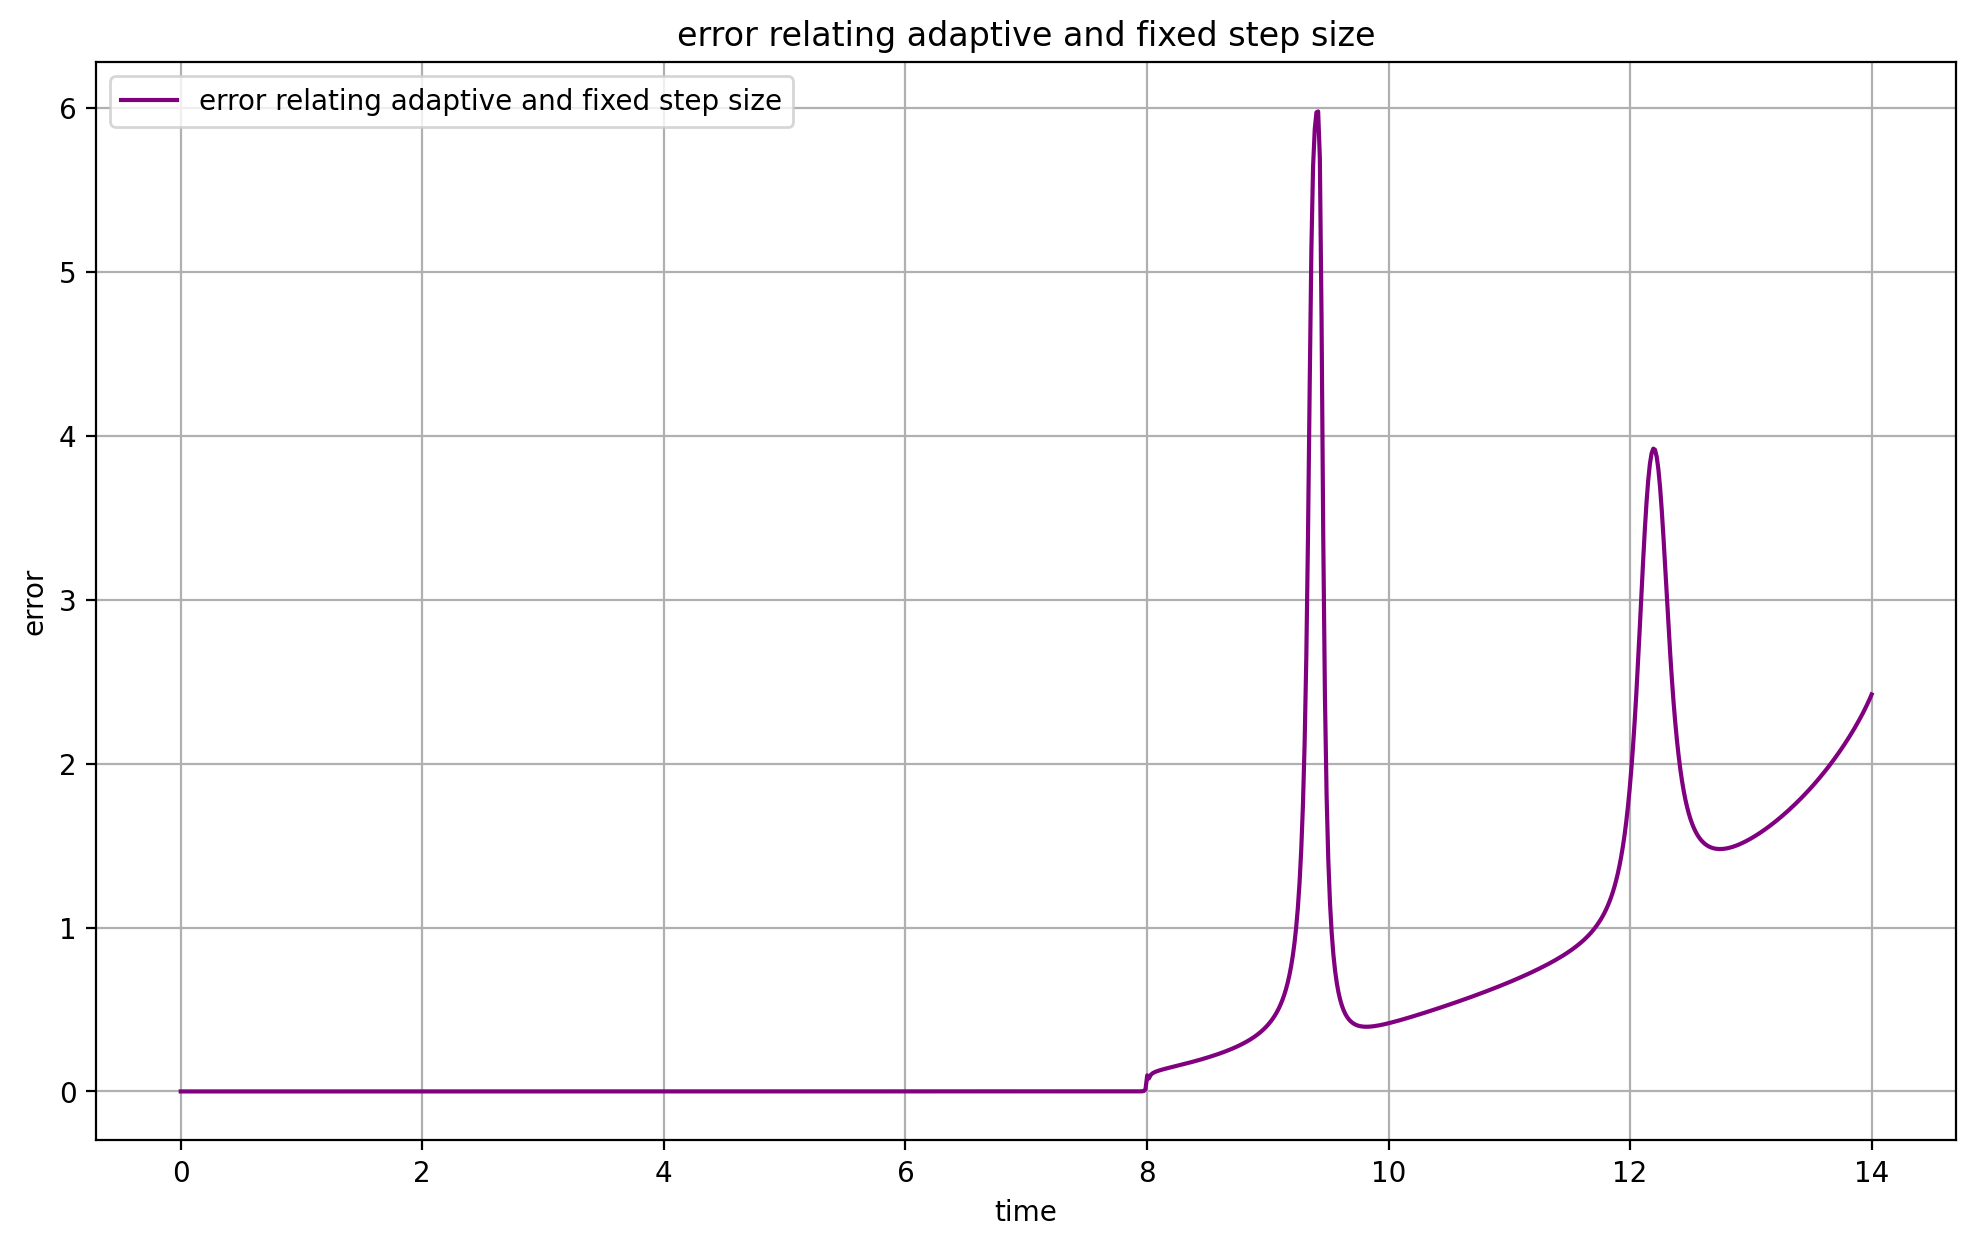

In [31]:
t_eval = np.linspace(0, 14, 1000)
effect_force = solve_ivp(He_with_factor, t_span, y0, t_eval=t_eval_exact, args=(1.0,))
effect_force_weak = solve_ivp(He_with_factor, t_span, y0, t_eval=t_eval_exact, args=(0.01,))

def solve_adaptive(y0, t_span, t_eval):
    solution=solve_ivp(He_with_factor,t_span,y0,t_eval=t_eval,method='RK45',atol=1e-10,rtol=1e-8,args=(interaction_factor,))
    return solution.t, solution.y.T


def solve_fixed(y0, t_span, t_eval):
    solution = solve_ivp(He_with_factor,t_span,y0,t_eval=t_eval,method='RK45',atol=1e30,rtol=1e30,max_step=t_eval[1]-t_eval[0],args=(interaction_factor,))
    return solution.t, solution.y.T

interaction_factor = 1.0
t_adaptive, solution_adaptive = solve_adaptive(y0, t_span, t_eval)
t_fixed, solution_fixed = solve_fixed(y0, t_span, t_eval)

error = np.linalg.norm(solution_fixed - solution_adaptive,axis=1)

plt.plot(t_eval, error, label="error relating adaptive and fixed step size",color="purple")
plt.title("error relating adaptive and fixed step size")
plt.xlabel("time")
plt.ylabel("error")
plt.grid()
plt.legend()
plt.show()



*Simulation 3*

This simulation displays the effect that the magnitude of the Coulomb's force has on the electron-electron interaction in a 2D classical helium atom. The trajectories under an interaction factor of 1, highlighted by the colors purple and red, shift to a chaotic dynamic and showcase a transfer of energy between the electron 1 and electron 2 that leads to autoionization. The process varies depending on the initial conditions and it is consistent with chaotic transients. On the other hand, the trajectories under an interaction factor of 0.01, highlighted by colors green and blue are stable and periodic, indicating that the weaking in the electron-electron interaction reduces the chaotic dynamics of the system. The normal force scenario demonstrates the random and unpredictable nature of autoionization, while the weaker force scenario showcases how modifying the interaction factor can stabilize the system[[6](https://dspace.mit.edu/bitstream/handle/1721.1/120336/5-61-fall-2013/contents/lecture-notes/MIT5_61F13_Lecture21-22.pdf)].

The escape trajectory of electron 1 under normal forces enhances the impact of strong Coulomb interactions. Before the escape, the system undergoes chaotic transients, with the electrons exhibiting overlapping orbits and rapid changes in direction due to the repulsive force acting between them. The weaker interaction reduces these chaotic dynamics, allowing both electrons to settle into stable, non-overlapping orbits.

This graph highlights the significant influence of electron-electron interactions on the dynamics of a classical helium atom. The normal force case demonstrates the complexity and chaotic behavior of a three-body system, where energy transfer leads to the ejection of one electron. The weakened force case demonstrates how reduced interactions can stabilize the system and suppress sudden shifts to chaotic dynamics, such as autoionization [[10](https://link.springer.com/article/10.1007/s00214-023-02984-z)].

# 5.0 Conclusion

Through the studying of the 2D classical helium atom by the use of the various ODE techniques, valuable findings have been identified in this report. When looking at parameters such as energy and angular momentum, a comparison can be drawn between the Euler, RK2 and leapfrog integration methods when it comes to their precision and accuracy in obeying the conservation principle that governs any type of physical system. Since the system is strictly solved through using classical physics, phenomenon's such as chaotic transients and autoionization may arise when varying the initial conditions that build the model. The Euler method is a simplistic method that gathers cumulative error through its solving and it is the least precise technique out of the three. It is not suitable when involving such complex dynamics and produces an error for the total energy and angular momentum.. Such disparity in results leads for the RK2 and leapfrog integration methods to be more accurate when approaching this system, with leapfrog integration being the most effective out of the three, due to its ability to conserve energy and angular momentum in the long-term behavior of the system. When the system shifts to un-linearity, introducing chaotic transients, the leapfrog method's staggering technique doesn't allow the system to diverge completely and keeps it in tact, obeying to the principle of conservation.

Additionally, to observe these behaviors caused by the classical helium atom, simulations were generated to allow a visual representation. Each simulation begins by showcasing a linear system, in which two electrons are orbiting around the nucleolus, via attractive and repulsive forces. 
The first two simulations were produced to showcase the effect on varying the initial conditions that build the helium atom and offer key findings on the matter. In the first simulation even if it enters a chaotic dynamic, it is not as sudden as in the second simulation. This was found to be caused by the exchange in energy between the two electrons. In the first simulation, the two electrons show the two orbits spirals around the nucleolus, displaying an exchange in energy between the two but none of them gain enough to overcome the electrostatic force of attraction that binds the atom together. Their orbits showcase an erratic behavior but the system's dynamics remain linear until the very end, where a shift into a chaotic state can be observed. Contrasting this, in the second simulation since the initial conditions were modified, a more sudden non-linear behavior can be identified. Electron 1 gains enough energy by electron 2 and it escapes the outer-shell orbit and before it does, chaotic transients can be observed, ultimately leading to disorder in the system. This highlights the limitations of this project and how it cannot be solved only using classical mechanics, and how the introduction of quantum mechanics modelling is required, in order to study more complex and dynamic systems.
The final and third simulation was provided to offer insight on the effect that the strength of the Coulomb force that governs the system may have on the linearity of the model. By changing the scale of the interaction factor from 1 to 0.01, a comparison can be drawn between the two behaviors. When the interaction factor is equal to 1, the system showcases a shift to a chaotic dynamic, possibly due to the force being very strong, which causes the two electrons to orbit in the outer-shell region so fast that leads to an exchange in energy at this same pace, leading electron 1 to gain enough energy suddenly. However, when the interaction factor is equal to 0.01, the exchange in energy is more gradual and slower, which stabilizes the system and prevents chaotic transients from occurring. By applying a weaker force to the system, the effect of the variation of the initial conditions can be drawn more accurately when studying their influence on the un-linearity that the model may present.

To highlight the precision and error dealt with this project, a comparison between fixed-step and adaptive-step solvers revealed that adaptive methods were better suited for handling chaotic transients. The error analysis demonstrated how fixed-step solvers cannot be applied when dealing to sudden and random changes in the system, while adaptive solvers maintained accuracy by adjusting the step size. This finding underscores the importance of choosing appropriate numerical techniques when modeling systems with highly sensitive dynamics.

In conclusion, this report highlighted the complexity of modeling the 2D classical helium atom using ODE technique, the simulations underscored the interaction between attractive and repulsive forces, the role of chaotic transients, and the phenomenon of autoionization. The findings also emphasized the critical role of numerical precision on the system's behavior. By comparing different methods, the study provided a comprehensive understanding of the system and ultimately showcased that this model must be solved semi-classically and that at some point it fails the classical theory. Hence the introduction of quantized energy levels and tunneling effects are required, when observing small-scale interactions. This will also need more complex solving and numerical accuracy methods which will lead to a better understating and solving of this complex and dynamic system.

# 6.0 References

[0] https://www.pnw.edu/wp-content/uploads/2020/03/Lecture-Notes-10-5.pdf <br>
[1] https://en.wikipedia.org/wiki/Leapfrog_integration <br>
[2] https://en.wikipedia.org/wiki/Main_Page <br>
[3] https://www.britannica.com/science/helium-chemical-element <br>
[4] https://www.researchgate.net/publication/13237773_Helium_atom_as_a_classical_three-body_problem <br>
[5] https://link.springer.com/book/10.1007/978-1-4757-9751-0 <br>
[6] https://dspace.mit.edu/bitstream/handle/1721.1/120336/5-61-fall-2013/contents/lecture-notes/MIT5_61F13_Lecture21-22.pdf <br>
[7] https://riptutorial.com/matplotlib/example/23558/basic-animation-with-funcanimation <br>
[8] https://watermark.silverchair.com/100-6-1089.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAA1QwggNQBgkqhkiG9w0BBwagggNBMIIDPQIBADCCAzYGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMiuFhUVXmu_ILY0BpAgEQgIIDB0onmgdIzbDesFW2Z3JB0WLUf0gnqxBXk5P6htWpYzqITTykzrUiLw59T35NS0T_jN8s_tEO0PjpWeIlmKy6Fi8VETGVTgJXU99SgMk1XEvSyndQOQncjUhrcWvxqniYKgLzI3XCvBzlqtz1HozRtTCFd6Ix12tGDfxZBTGx2AGtP1g0gF9psejTSK1VKYqrv69LkKSAg1fP6qZGLIYyEoDqAaNegUKk6sm4U6QRG29dR8W1uklgxauBCPdQjvJzlJS_NAA8LVg24Rl_mo1Ck-WnrGjV8RqkByELrO7lXnFndiTaz4xAvraY3G2tRuiD_N3G1DRYjidKTzZiPFxup-npjPBOURHwTI2hcQF23Wki-iefF-wTgl12YC8NMZZAJxl-FlYjzkIudYzyjM_e9vGZn39kTXSjRURzJoIpJLB6vydObzba1TEsUtP32TBm5WIm3DUwiemtDPfB3soHrvDPtNOVmOFsUmNVeLB8FzlQuSPzueros8WSIeHlLOEss7iGefLwSSQSxrA8esgzMjCMmWzQHraWbTys8D0AtAp_AwARbb4l2cE2o0_dDD1DyaxqkGQ1aLc03jNwlN8ys-h3tMl0ZwIvKrakOXEB4UAI6jWX03u48utStB9vXCH9_MwiWWHWDqt8WkmUU9ODlpOyCTqZryKvt0eSbcPnNDqd2cxlRS7ORFGllQ3Y1YrFypGm3lGoUB-qr_HRND9Y3EH9xw3ptFBwEOeL2zdQarPS7XaRGZg5S5u9hJoOTDuDCiCQYpcOQAQNi2J7-Mnlgx4L9w1KP67qDZKcPmJhsfPdwQHwKgK7OfxxABeIA8v2tT9SO7sN1Dh8LXF6qYNWlcUb1XWeSFQTD41urbZUOCjEltWMqhfV2fp88FIPgaYQfc4AeGDwz9jJWJSCAdPAG2lcCBZubtpwvby_bCpMgKiH6JcHaOlYSGCZE_42zxe0qp6wAhVtJpxpJFLZcFgMkNBIw-1xcK19q-8gf9bBQdIPvJj5HFSeJ342KlPicNTPz4GgI1k9Wa8 <br>
[9] https://arxiv.org/pdf/1111.5794 <br>
[10] https://link.springer.com/article/10.1007/s00214-023-02984-z

In [32]:
import nbformat
def word_count(notebook):
    """Prints the word count in Markdown cells of the file named notebook."""
    with open(notebook, 'r', encoding='utf-8') as f:
        nb = nbformat.read(f, as_version=4)
    word_count = 0
    total_word_count = 0
    for cell in nb['cells']:
        if cell['cell_type'] == "markdown":
            lines = cell['source'].split('\n')
            for line in lines:
                if len(line) > 0 and line[0] == '#':
                    print(word_count)
                    total_word_count += word_count
                    word_count = 0
                    print(line.strip(), end=" ==> ")
                else:
                    word_count += len(line.lstrip().split(' '))
    print(word_count)
    print("Total ==> ", total_word_count)
word_count("final_project_2D_classical_helium_atom_dafne_petrelli.ipynb")

0
# *2D classical Helium atom: Using ordinary differential equations, including first and second degree,  to realize a simulation regarding the motion of electrons in the 2D classical Helium atom.* ==> 10
# *1.0 Abstract* ==> 407
# *2.0 Introduction* ==> 185
# *3.0  Method* ==> 1
# 3.1  Section 1: Numerical precision ==> 1108
# 3.2  Section 2: Simulation ==> 64
# 4.0 Discussion and analysis ==> 814
# 5.0 Conclusion ==> 856
# 6.0 References ==> 32
Total ==>  3445
